In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()
cast = pd.read_csv('cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [2]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)

release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# 1. Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

<Axes: >

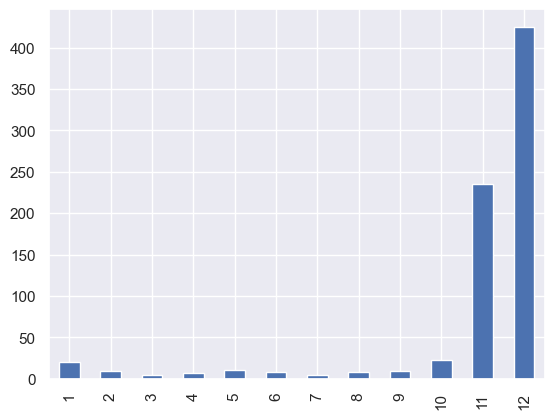

In [6]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)

release_dates = release_dates.dropna(subset=['title'])

stNick = release_dates[release_dates['title'].str.contains('Christmas')]

stNick['date'].dt.month.value_counts().sort_index().plot(kind='bar')

# 2. Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

<Axes: >

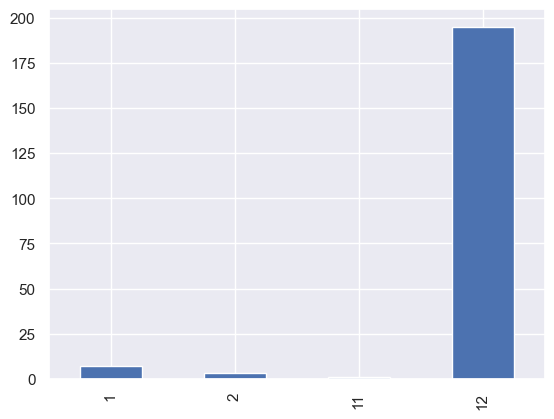

In [10]:
frodoBaggins = release_dates[release_dates.title.str.startswith('The Hobbit')]
frodoBaggins.date.dt.month.value_counts().sort_index().plot(kind='bar')

# 3. Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

C:\Users\pater\AppData\Local\Temp\ipykernel_14804\1818411251.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  romance_movies_usa['day_of_week'] = romance_movies_usa['date'].dt.day_name()


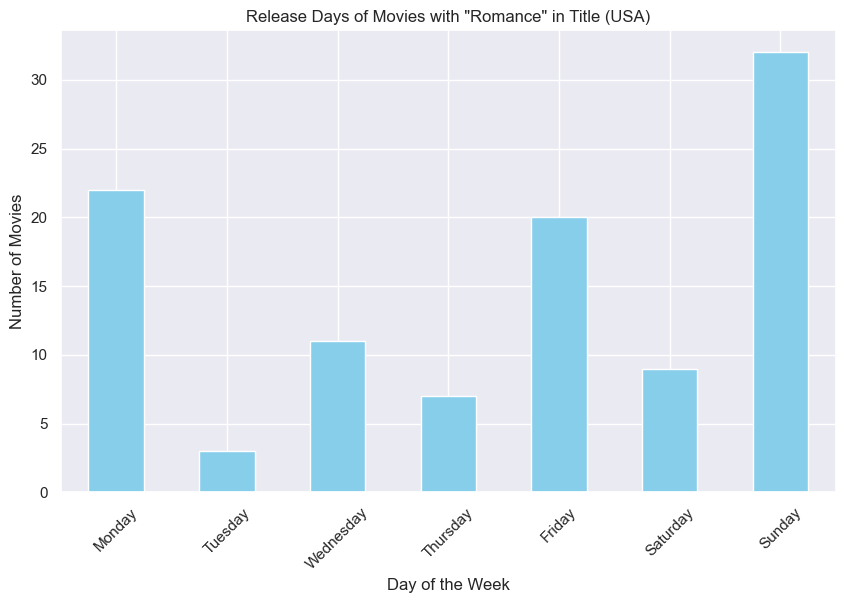

In [12]:
import matplotlib.pyplot as plt
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)

# Drop rows with missing title values
release_dates = release_dates.dropna(subset=['title'])

# Filter movies with "Romance" in their title and released in the USA
romance_movies_usa = release_dates[(release_dates['title'].str.contains('Romance', case=False, na=False)) & (release_dates['country'] == 'USA')]

# Extract the day of the week from the 'date' column using .dt.day_name()
romance_movies_usa['day_of_week'] = romance_movies_usa['date'].dt.day_name()

# Count the frequency of each day of the week and plot
day_of_week_counts = romance_movies_usa['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a bar plot
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.title('Release Days of Movies with "Romance" in Title (USA)')
plt.xticks(rotation=45)
plt.show()

# 4. Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

C:\Users\pater\AppData\Local\Temp\ipykernel_14804\272228932.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_movies_usa['day_of_week'] = action_movies_usa['date'].dt.day_name()


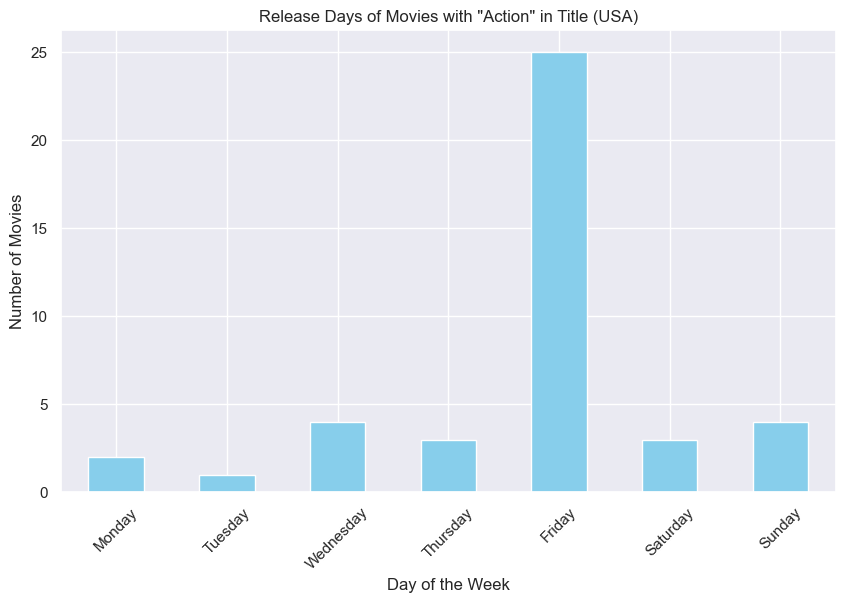

In [13]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)

# Drop rows with missing title values
release_dates = release_dates.dropna(subset=['title'])

# Filter movies with "Action" in their title and released in the USA
action_movies_usa = release_dates[(release_dates['title'].str.contains('Action', case=False, na=False)) & (release_dates['country'] == 'USA')]

# Extract the day of the week from the 'date' column using .dt.day_name()
action_movies_usa['day_of_week'] = action_movies_usa['date'].dt.day_name()

# Count the frequency of each day of the week and plot
day_of_week_counts = action_movies_usa['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a bar plot
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.title('Release Days of Movies with "Action" in Title (USA)')
plt.xticks(rotation=45)
plt.show()

# 5. On which date was each Judi Dench movie from the 1990s released in the USA?

In [14]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)

# Load the cast DataFrame (assuming you have it)
cast = pd.read_csv('cast.csv')

# Filter Judi Dench movies from the 1990s
judi_dench_1990s = cast[(cast['name'] == 'Judi Dench') & (cast['year'] >= 1990) & (cast['year'] <= 1999)]

# Filter movies released in the USA
judi_dench_1990s_usa = judi_dench_1990s.merge(release_dates, on=['title', 'year'])
judi_dench_1990s_usa = judi_dench_1990s_usa[judi_dench_1990s_usa['country'] == 'USA']

# Display the release date for each movie
print(judi_dench_1990s_usa[['title', 'date']])

                       title       date
1                  GoldenEye 1995-11-17
40                    Hamlet 1996-12-25
71              Jack & Sarah 1996-03-22
78                 Mrs Brown 1997-10-03
101      Shakespeare in Love 1999-01-08
147       Tea with Mussolini 1999-05-14
173  The World Is Not Enough 1999-11-19
246      Tomorrow Never Dies 1997-12-19


# 6. In which months do films with Judi Dench tend to be released in the USA?

In [18]:
cast = pd.read_csv('cast.csv')

# Load the release_dates DataFrame (assuming you have it)
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)

# Filter movies with Judi Dench released in the USA and count releases by month
judiDench = pd.merge(cast[cast.name == 'Judi Dench'], release_dates[release_dates.country == 'USA'])
release_counts_by_month = judiDench.date.dt.month.value_counts().sort_index()

# Display the release counts by month
print(release_counts_by_month)

1      4
2      3
3      3
4      2
5      4
6      3
7      1
8      1
9      2
10     2
11    12
12     4
Name: date, dtype: int64


# 7. In which months do films with Tom Cruise tend to be released in the USA?

In [19]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)

# Filter movies with Tom Cruise released in the USA and count releases by month
tommyC = pd.merge(cast[cast.name == 'Tom Cruise'], release_dates[release_dates.country == 'USA'])
release_counts_by_month = tommyC.date.dt.month.value_counts().sort_index()

# Display the release counts by month
print(release_counts_by_month)

1      2
3      1
4      3
5      5
6      8
7      8
8      3
9      1
10     3
11     3
12    10
Name: date, dtype: int64
